In [291]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [292]:
file_path = 'AmesHousing.csv'
data = pd.read_csv(file_path)

max_null_percentage = 0.2  # Allow only columns with up to 20% nulls to clean the dataset
filtered_data = data.loc[:, data.isnull().mean() <= max_null_percentage]

num_cols = filtered_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = filtered_data.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='mean')
filtered_data.loc[:, num_cols] = num_imputer.fit_transform(filtered_data[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
filtered_data.loc[:, cat_cols] = cat_imputer.fit_transform(filtered_data[cat_cols])

lower_limit = filtered_data['Lot Area'].quantile(0.20)
upper_limit = filtered_data['Lot Area'].quantile(0.80)

pool_area = filtered_data['Pool Area'] < 1
bldg_type = filtered_data['Bldg Type'] == '1Fam'
full_bath = filtered_data['Full Bath'] < 3

final_filtered_data = filtered_data[(filtered_data['Lot Area'] >= lower_limit) &
                                    (filtered_data['Lot Area'] <= upper_limit) &
                                    pool_area &
                                    bldg_type &
                                    full_bath]
final_filtered_data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
5,6,527105030,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,195500
9,10,527162130,60,RL,60.0,7500,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,6,2010,WD,Normal,189000
10,11,527163010,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,175900


In [293]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

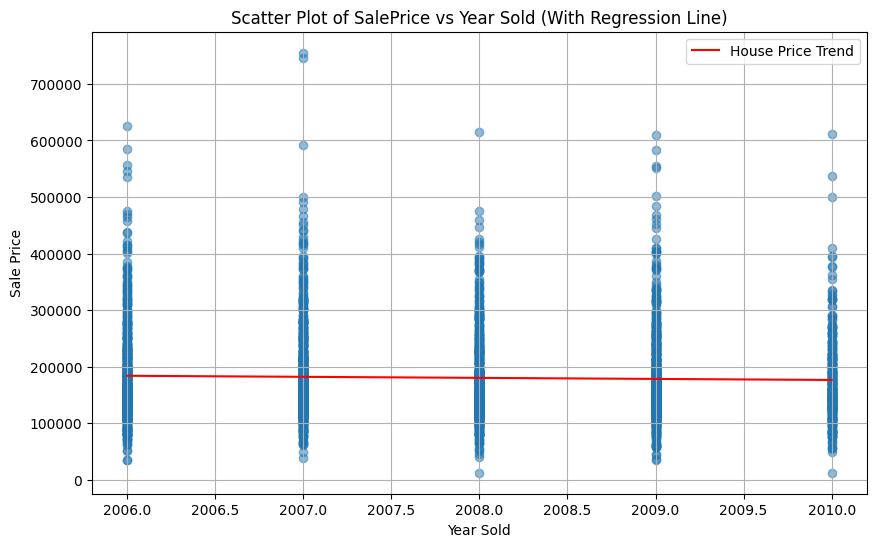

In [294]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Yr Sold'], filtered_data['SalePrice'], alpha=0.5)

x = filtered_data['Yr Sold']
y = filtered_data['SalePrice']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept, color='red', label='House Price Trend')

plt.title('Scatter Plot of SalePrice vs Year Sold (With Regression Line)')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.grid(True)
plt.legend()

plt.show()

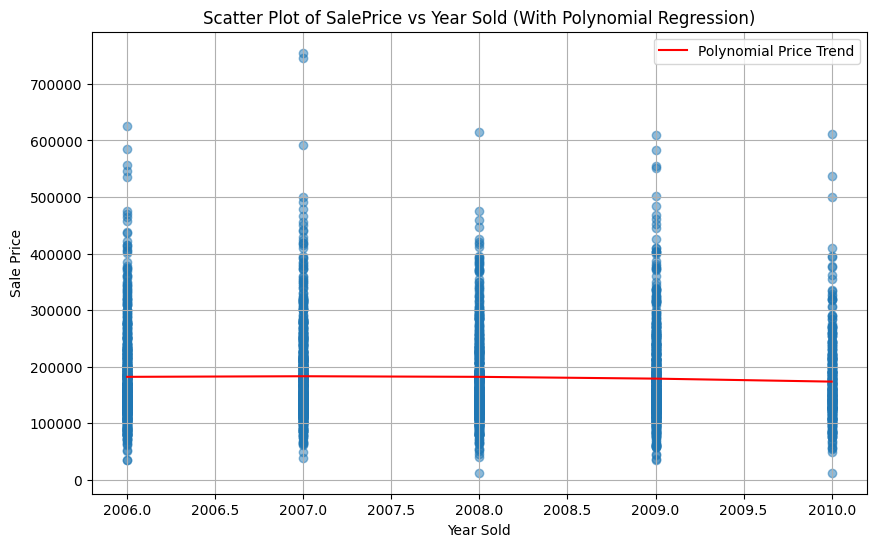

In [295]:
plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Yr Sold'], filtered_data['SalePrice'], alpha=0.5)
x = filtered_data['Yr Sold'].values.reshape(-1, 1)
y = filtered_data['SalePrice'].values
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
sorted_idx = np.argsort(x.flatten())
plt.plot(x[sorted_idx], y_poly_pred[sorted_idx], color='red', label='Polynomial Price Trend')
plt.title('Scatter Plot of SalePrice vs Year Sold (With Polynomial Regression)')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.grid(True)
plt.legend()

plt.show()

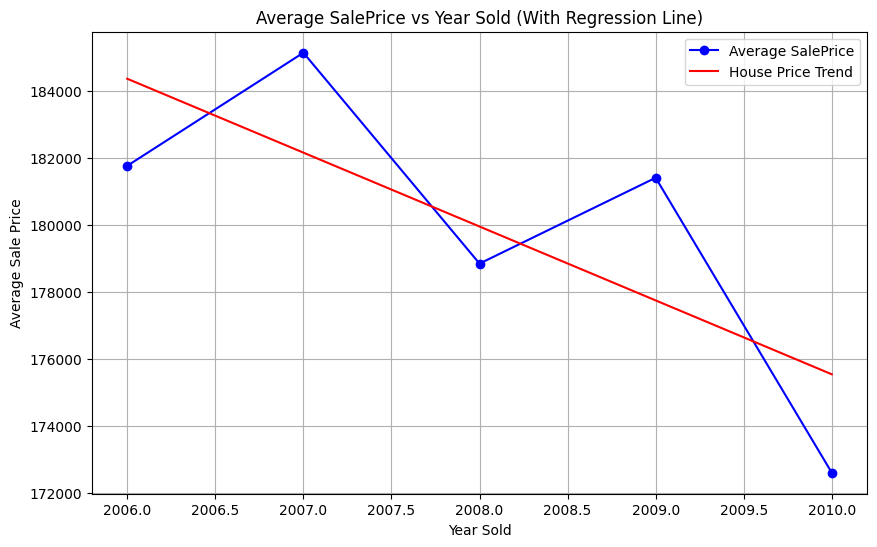

In [296]:
yearly_avg = filtered_data.groupby('Yr Sold')['SalePrice'].mean()

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', color='blue', label='Average SalePrice')

slope, intercept = np.polyfit(yearly_avg.index, yearly_avg.values, 1)
plt.plot(yearly_avg.index, slope * yearly_avg.index + intercept, color='red', label='House Price Trend')

plt.title('Average SalePrice vs Year Sold (With Regression Line)')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.legend()

plt.show()

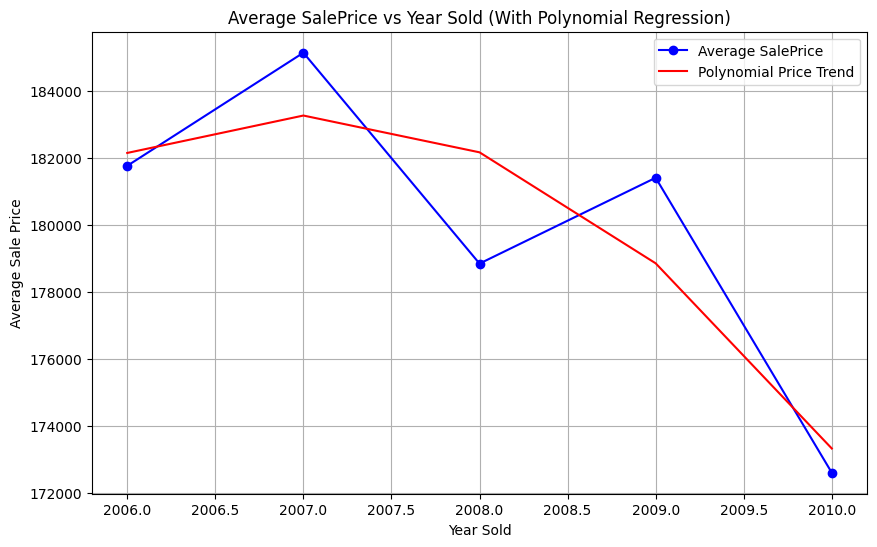

In [297]:
yearly_avg = filtered_data.groupby('Yr Sold')['SalePrice'].mean()

x = yearly_avg.index.values.reshape(-1, 1)
y = yearly_avg.values

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

y_poly_pred = model.predict(x_poly)

plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', color='blue', label='Average SalePrice')
plt.plot(yearly_avg.index, y_poly_pred, color='red', label='Polynomial Price Trend')

plt.title('Average SalePrice vs Year Sold (With Polynomial Regression)')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.legend()

plt.show()

In [298]:
##LinearRegression

features = ['Lot Area', 'Gr Liv Area', 'Overall Qual', 'Year Built', 'Full Bath', 'TotRms AbvGrd']
X = final_filtered_data[features]
y = final_filtered_data['SalePrice']


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()


lin_reg.fit(X_train, y_train)

some_data = X_test.iloc[:5]
some_labels = y_test.iloc[:5]


some_predictions = lin_reg.predict(some_data)


print("LinearRegression Predictions:", some_predictions)
print("Actual Labels:", list(some_labels))

y_test_pred = lin_reg.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

LinearRegression Predictions: [179590.50139394 205628.03762457 133184.24916029 228575.22369511
 129541.70439403]
Actual Labels: [178000, 193000, 122000, 201000, 147500]
Mean Absolute Error: 18848.990399088867
Root Mean Squared Error: 25171.240284020598


In [299]:
##PolynomialRegression

features = ['Lot Area', 'Gr Liv Area', 'Overall Qual', 'Year Built', 'Full Bath', 'TotRms AbvGrd']
X = final_filtered_data[features]
y = final_filtered_data['SalePrice']


X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)


some_data_poly = X_test_poly[:5]
some_labels = y_test.iloc[:5]

some_predictions_poly = poly_reg.predict(some_data_poly)


print("PolynomialRegression Predictions:", some_predictions_poly)
print("Actual Labels:", list(some_labels))


y_test_pred_poly = poly_reg.predict(X_test_poly)


mae_poly = mean_absolute_error(y_test, y_test_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))


print(f"Polynomial Regression MAE: {mae_poly}")
print(f"Polynomial Regression RMSE: {rmse_poly}")

PolynomialRegression Predictions: [174953.47140252 199220.66383664 132772.26619634 229042.96027257
 122072.88951653]
Actual Labels: [178000, 193000, 122000, 201000, 147500]
Polynomial Regression MAE: 17823.78062712459
Polynomial Regression RMSE: 24164.444153868113


In [300]:
## GradientBoostingregressor

from sklearn.ensemble import GradientBoostingRegressor


features = ['Lot Area', 'Gr Liv Area', 'Overall Qual', 'Year Built', 'Full Bath', 'TotRms AbvGrd']
X = final_filtered_data[features]
y = final_filtered_data['SalePrice']

X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbr.fit(X_train, y_train)

some_data = X_test.iloc[:5]
some_labels = y_test.iloc[:5]

some_predictions_gbr = gbr.predict(some_data)

print("Gradient Boosting Predictions:", some_predictions_gbr)
print("Actual Labels:", list(some_labels))

y_test_pred_gbr = gbr.predict(X_test)

mae_gbr = mean_absolute_error(y_test, y_test_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_test_pred_gbr))

print(f"Gradient Boosting Regressor MAE: {mae_gbr}")
print(f"Gradient Boosting Regressor RMSE: {rmse_gbr}")

Gradient Boosting Predictions: [175746.85385423 191667.63292325 131206.44900536 241834.98406307
 114036.15570171]
Actual Labels: [178000, 193000, 122000, 201000, 147500]
Gradient Boosting Regressor MAE: 17100.794108160888
Gradient Boosting Regressor RMSE: 23732.839954361472


In [289]:
##RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

features = ['Lot Area', 'Gr Liv Area', 'Overall Qual', 'Year Built', 'Full Bath', 'TotRms AbvGrd']
X = final_filtered_data[features]
y = final_filtered_data['SalePrice']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

rf_reg.fit(X_train, y_train)

some_data = X_test.iloc[:5]
some_labels = y_test.iloc[:5]

some_predictions_rf = rf_reg.predict(some_data)

print("Random Forest Predictions:", some_predictions_rf)
print("Actual Labels:", list(some_labels))

y_test_pred_rf = rf_reg.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print(f"Random Forest Regressor MAE: {mae_rf}")
print(f"Random Forest Regressor RMSE: {rmse_rf}")

Random Forest Predictions: [175769.91 181313.25 129424.5  243698.84 117863.5 ]
Actual Labels: [178000, 193000, 122000, 201000, 147500]
Random Forest Regressor MAE: 17804.33731216931
Random Forest Regressor RMSE: 24840.53428593245
